# Demo - Fitzhugh-Nagumo neural model

ref: https://en.wikipedia.org/wiki/FitzHugh–Nagumo_model

The FitzHugh–Nagumo model (FHN), named after Richard FitzHugh (1922–2007) who suggested the system in 1961 and J. Nagumo et al. who created the equivalent circuit the following year, describes a prototype of an excitable system (e.g., a neuron).

The FHN Model is an example of a relaxation oscillator because, if the external stimulus  $I_{\text{ext}}$ exceeds a certain threshold value, the system will exhibit a characteristic excursion in phase space, before the variables $v$ and $w$ relax back to their rest values.

This behaviour is typical for spike generations (a short, nonlinear elevation of membrane voltage $v$, diminished over time by a slower, linear recovery variable $w$) in a neuron after stimulation by an external input current.

The equations for this dynamical system read

\begin{align}
\dot{v} &= v - \frac{v^3}{3} -w + RI_{\text{ext}} \\
\tau \dot{w} &= v + a - bw 
\end{align}

The dynamics of this system can be nicely described by zapping between the left and right branch of the cubic nullcline.

The FitzHugh–Nagumo model is a simplified 2D version of the Hodgkin–Huxley model which models in a detailed manner activation and deactivation dynamics of a spiking neuron. In the original papers of FitzHugh, this model was called Bonhoeffer–Van der Pol oscillator (named after Karl-Friedrich Bonhoeffer and Balthasar van der Pol) because it contains the Van der Pol oscillator as a special case for $a=b=0$. The equivalent circuit was suggested by Jin-ichi Nagumo, Suguru Arimoto, and Shuji Yoshizawa.

## Code example

Import the necessary pagages

In [2]:
import ap_features as apf
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

Define the right hand side of the ODE

In [3]:
def fitzhugh_nagumo(t, x, a, b, tau, Iext):
    """Time derivative of the Fitzhugh-Nagumo neural model.
    Parameters

    Parameters
    ----------
    t : float
        Time (not used)
    x : np.ndarray
        State of size 2 - (Membrane potential, Recovery variable)
    a : float
        Parameter in the model
    b : float
        Parameter in the model
    tau : float
        Time scale
    Iext : float
        Constant stimulus current

    Returns
    -------
    np.ndarray
        dx/dt - size 2
    """
    return np.array([x[0] - x[0] ** 3 - x[1] + Iext, (x[0] - a - b * x[1]) / tau])

Select some parameters and solve the system

In [4]:
a = -0.3
b = 1.4
tau = 20
Iext = 0.23
time = np.linspace(0, 999, 1000)
res = solve_ivp(
    fitzhugh_nagumo,
    [0, 1000],
    [0, 0],
    args=(a, b, tau, Iext),
    t_eval=time,
)

Collect the solutions and create a beats object

In [8]:
v = res.y[0, :]
w = res.y[1, :]

s = apf.Beats(y=v, t=time)

<IPython.core.display.Javascript object>


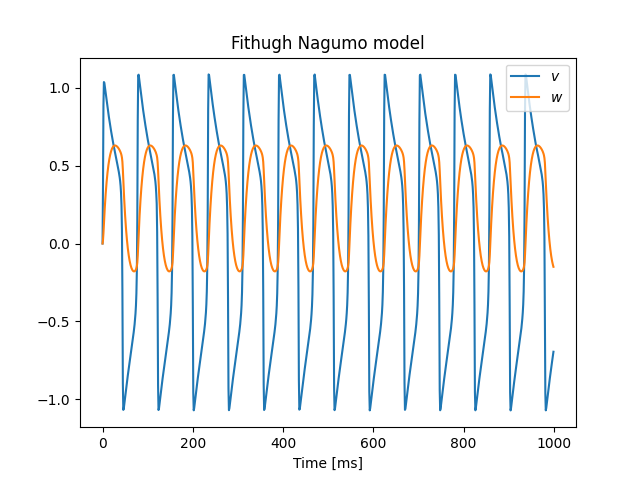

In [9]:
fig, ax = plt.subplots()
ax.plot(time, v, label="$v$")
ax.plot(time, w, label="$w$")
ax.legend()
ax.set_xlabel("Time [ms]")
ax.set_title("Fithugh Nagumo model")
plt.show()

We can now chop the trace into indivisual beats

In [10]:
beats = s.chop()
print(beats)

[Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,)), Beat(t=(80,), y=(80,))]


And plot them

<IPython.core.display.Javascript object>


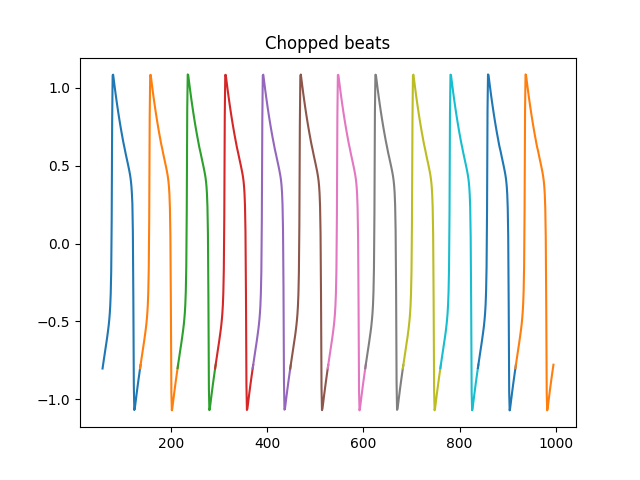

Text(0.5, 1.0, 'Chopped beats')

In [12]:
fig, ax = plt.subplots()
for beat in beats:
    ax.plot(beat.t, beat.y)
ax.set_title("Chopped beats")
plt.show()

We can also plot the action potential duration for each beat

<IPython.core.display.Javascript object>


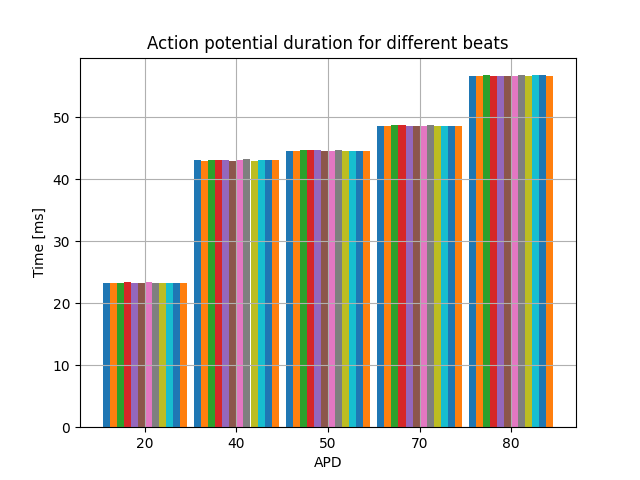

In [13]:
# Plot some APDs
fig, ax = plt.subplots()
apds = [20, 40, 50, 70, 80]
N = len(apds)
x = np.arange(N)
width = 1 / (s.num_beats + 1)
for i, beat in enumerate(beats):
    ax.bar(x + i * width, [beat.apd(apd) for apd in apds], width=width)
ax.set_xticks(x + 0.5 - width)
ax.set_xticklabels(apds)
ax.set_ylabel("Time [ms]")
ax.set_xlabel("APD")
ax.grid()
ax.set_title("Action potential duration for different beats")
plt.show()